In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
data = pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [36]:
data['Year'] = data['Year'].astype(np.float64)   

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    112 non-null    float64
 1   Price   112 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = data['Year']

y = data['Price']

In [40]:
X = np.array(X)
X = X.reshape(-1,1)
#X
#X = pd.DataFrame(X)
#X

# Linear Regression

In [41]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-3564922131.7258463


# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [45]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-3564800816.6412597


# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [47]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3564800816.6412597


# Training and Testing

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)


In [23]:
from sklearn.metrics import mean_squared_error,r2_score


In [24]:
mse_lasso = mean_squared_error(y_test,prediction_lasso)
r2_lasso = r2_score(y_test,prediction_lasso)

In [26]:
print(f" Lasso regression MSE is: {mse_lasso}")
print(f" Lasso regressionr_squared is: {r2_lasso}")


 Lasso regression MSE is: 3592128796.1033382
 Lasso regressionr_squared is: 0.5365682045440207


In [28]:
model_linear = lr.fit(X_train,y_train)
prediction_linear = model_linear.predict(X_test)

In [29]:
mse_linear = mean_squared_error(y_test,prediction_linear)
r2_linear = r2_score(y_test,prediction_linear)

In [30]:
print(f" Linear regression MSE is: {mse_linear}")
print(f" Linear regressionr_squared is: {r2_linear}")

 Linear regression MSE is: 3962573261.894448
 Linear regressionr_squared is: 0.4887760028600123


In [19]:
pred1 = ridge_regressor.predict(pd.DataFrame([2022]))
print(pred1)

[714704.98110302]


# Model Comparision

In [31]:
if mse_linear < mse_lasso and r2_linear > r2_lasso:
    print("Linear regression performs better")
elif mse_lasso < mse_linear and r2_lasso > r2_linear:
    print("Lasso regression performs better")
else :
    print('Both models are similar in performance')

Lasso regression performs better


In [20]:
import seaborn as sns

C:\Users\ajiakshay\AppData\Local\Temp\ipykernel_5276\1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

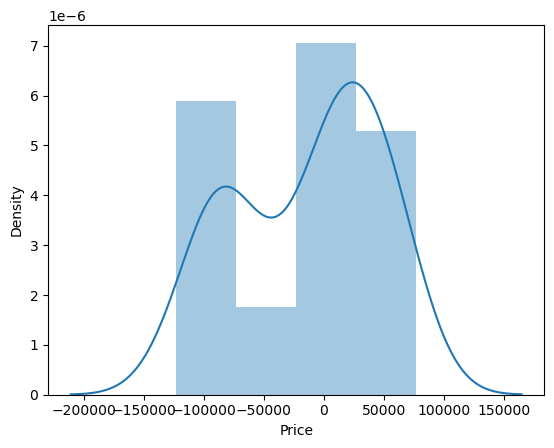

In [21]:
sns.distplot(y_test-prediction_lasso)

C:\Users\ajiakshay\AppData\Local\Temp\ipykernel_5276\1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='Price', ylabel='Density'>

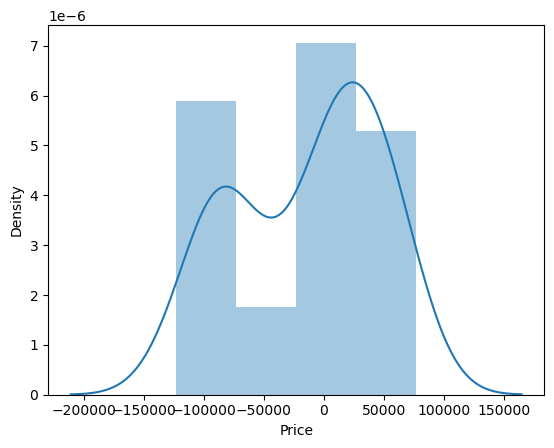

In [22]:
sns.distplot(y_test-prediction_ridge)

In [70]:
#from sklearn.linear_model import LinearRegression

In [71]:
#lr = LinearRegression()


In [72]:
#model = lr.fit(X_train,y_train)

In [11]:
#predictions = model.predict(X_test)

In [12]:
#from sklearn.metrics import mean_squared_error,r2_score

In [90]:
#print('MSE is: \n',mean_squared_error(y_test,predictions))

In [91]:
#np.sqrt(mean_squared_error(y_test,predictions))

In [89]:
#print('r2 score : \n', r2_score(y_test,predictions))

In [18]:
#from sklearn.preprocessing import MinMaxScaler

In [19]:
#X = data['Year']

#y = data['Price']

In [20]:
#X = pd.DataFrame(X)

In [21]:
#minmax = MinMaxScaler()

In [22]:
#X = minmax.fit_transform(X)

In [23]:
#type(X)

In [24]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
#lr = LinearRegression()
#model = lr.fit(X_train,y_train)
#pred=model.predict(X_test)
#print('MSE is : \n',mean_squared_error(y_test,pred))
#print('R2 score is : \n', r2_score(y_test,pred))

In [25]:
#from sklearn.preprocessing import StandardScaler

In [26]:
#X = data['Year']

#y = data['Price']
#X = pd.DataFrame(X)

In [27]:
#std = StandardScaler()
#X = std.fit_transform(X)
#x=pd.DataFrame(x)

In [28]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [29]:
#lr = LinearRegression()
#model = lr.fit(X_train,y_train)
#pred=model.predict(X_test)
#print('MSE is : \n',mean_squared_error(y_test,pred))
#print('R2 score is : \n', r2_score(y_test,pred))

In [30]:
#from sklearn.linear_model import Lasso

In [31]:
#lasso = Lasso(alpha=0.01)

In [32]:
#lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [33]:
#

In [34]:
#print("Slope: %.2f" % lasso.coef_[0])

Slope: 46979.01


In [35]:
#print("Intercept: %.2f" %lasso.intercept_)

Intercept: -94251401.06


In [36]:
#print('MSE is : \n',mean_squared_error(y_test,y_pred))

MSE is : 
 3878766838.5196795


In [37]:
#np.sqrt(mean_squared_error(y_test,y_pred))

62279.74661573118

In [88]:
#print('R2 score is : \n', r2_score(y_test,y_pred))